# EDA


In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
pos = pd.read_csv("data/positives.csv", index_col="time")
neg = pd.read_csv("data/negatives.csv", index_col="time")

In [17]:
missing_values_pos = pos.isna().sum()
missing_values_neg = neg.isna().sum()
print("Positive examples")
print("Columns with missing values, their counts and percentage of missing observations:")
for name, value in missing_values_pos.items():
    if value > 0:
        print(name + ': ' + str(value) + ';  ' + str(round(value / pos.shape[0] * 100, 2)) + '%')

print("Negative examples")
print("Columns with missing values, their counts and percentage of missing observations:")
for name, value in missing_values_neg.items():
    if value > 0:
        print(name + ': ' + str(value) + ';  ' + str(round(value / neg.shape[0] * 100, 2)) + '%')

Positive examples
Columns with missing values, their counts and percentage of missing observations:
lai: 2704;  1.05%
lst_day: 49397;  19.2%
lst_night: 65143;  25.33%
ndvi: 336;  0.13%
smi: 27151;  10.56%
Negative examples
Columns with missing values, their counts and percentage of missing observations:
lai: 10456;  2.01%
lst_day: 193211;  37.14%
lst_night: 215506;  41.42%
ndvi: 1315;  0.25%
smi: 67524;  12.98%
population: 60;  0.01%


In [18]:
for var in pos.columns:
    tmpPos = pos[var].values
    tmpNeg = neg[var].values

    tmpPos = tmpPos.reshape(tmpPos.size//30, 30)
    tmpNeg = tmpNeg.reshape(tmpNeg.size//30, 30)

    posMean = np.nanmean(tmpPos, axis=0)
    negMean = np.nanmean(tmpNeg, axis=0)

    tmpPos = np.where(np.isnan(tmpPos), posMean, tmpPos)
    tmpNeg = np.where(np.isnan(tmpNeg), negMean, tmpNeg)

    pos[var] = tmpPos.flatten()
    neg[var] = tmpNeg.flatten()

In [19]:
pos

,aspect,burned_areas,curvature,d2m,dem,ignition_points,lai,lst_day,lst_night,ndvi,...,lc_grassland,lc_settlement,lc_shrubland,lc_sparse_vegetation,lc_water_bodies,lc_wetland,population,burned_area_has,time_idx,sample
time,,,,,,,,,,,,,,,,,,,,,
2006-07-29,182.77820,0.0,-1469.686900,289.78036,142.89676,0.0,0.5,321.16000,295.520000,0.2461,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.20321,40.0,0.0,0.0
2006-07-30,182.77820,0.0,-1469.686900,290.09662,142.89676,0.0,0.5,317.60000,293.639980,0.2461,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.20321,40.0,1.0,0.0
2006-07-31,182.77820,0.0,-1469.686900,290.19055,142.89676,0.0,0.5,316.90000,293.000000,0.2461,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.20321,40.0,2.0,0.0
2006-08-01,182.77820,0.0,-1469.686900,290.22266,142.89676,0.0,0.5,316.80000,294.660000,0.2461,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.20321,40.0,3.0,0.0
2006-08-02,182.77820,0.0,-1469.686900,290.36680,142.89676,0.0,0.5,315.41998,295.919980,0.2461,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.20321,40.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-19,351.22073,0.0,-21.881104,287.77030,505.24857,0.0,0.2,316.25998,298.199980,0.1781,...,0.0,0.22604,0.0,0.576602,0.0,0.0,5349.81450,138.0,25.0,8573.0
2015-07-20,351.22073,0.0,-21.881104,285.27957,505.24857,0.0,0.2,323.88000,291.924075,0.1781,...,0.0,0.22604,0.0,0.576602,0.0,0.0,5349.81450,138.0,26.0,8573.0
2015-07-21,351.22073,0.0,-21.881104,283.50925,505.24857,0.0,0.2,320.12000,292.105662,0.1781,...,0.0,0.22604,0.0,0.576602,0.0,0.0,5349.81450,138.0,27.0,8573.0


In [20]:
neg

,aspect,burned_areas,curvature,d2m,dem,ignition_points,lai,lst_day,lst_night,ndvi,...,lc_grassland,lc_settlement,lc_shrubland,lc_sparse_vegetation,lc_water_bodies,lc_wetland,population,burned_area_has,time_idx,sample
time,,,,,,,,,,,,,,,,,,,,,
2006-04-02,6.933952,0.0,-27.86932,285.72403,10.045106,0.0,1.115523,300.380000,287.240000,0.466643,...,0.0,0.0,0.0,0.0,0.0,0.0,510.946840,0.0,0.0,0.0
2006-04-03,6.933952,0.0,-27.86932,284.85710,10.045106,0.0,1.117801,300.000000,286.318868,0.466507,...,0.0,0.0,0.0,0.0,0.0,0.0,510.946840,0.0,1.0,0.0
2006-04-04,6.933952,0.0,-27.86932,286.72308,10.045106,0.0,1.119237,299.800000,284.400000,0.466168,...,0.0,0.0,0.0,0.0,0.0,0.0,510.946840,0.0,2.0,0.0
2006-04-05,6.933952,0.0,-27.86932,285.88174,10.045106,0.0,1.120839,302.184325,286.402711,0.466121,...,0.0,0.0,0.0,0.0,0.0,0.0,510.946840,0.0,3.0,0.0
2006-04-06,6.933952,0.0,-27.86932,286.33005,10.045106,0.0,1.122299,302.206469,286.397118,0.466129,...,0.0,0.0,0.0,0.0,0.0,0.0,510.946840,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-25,3.546495,0.0,19832.52000,286.20728,1145.075400,0.0,0.800000,302.913247,286.799339,0.431800,...,0.0,0.0,0.0,0.0,0.0,0.0,13.033438,0.0,25.0,17341.0
2022-09-26,3.546495,0.0,19832.52000,283.32666,1145.075400,0.0,0.800000,302.828575,286.853916,0.431800,...,0.0,0.0,0.0,0.0,0.0,0.0,13.033438,0.0,26.0,17341.0
2022-09-27,3.546495,0.0,19832.52000,283.23392,1145.075400,0.0,0.800000,293.060000,285.180000,0.431800,...,0.0,0.0,0.0,0.0,0.0,0.0,13.033438,0.0,27.0,17341.0


In [21]:
print("The variables are ", neg.columns)

The variables are  Index(['aspect', 'burned_areas', 'curvature', 'd2m', 'dem', 'ignition_points',
       'lai', 'lst_day', 'lst_night', 'ndvi', 'rh', 'roads_distance', 'slope',
       'smi', 'sp', 'ssrd', 't2m', 'tp', 'wind_direction', 'wind_speed', 'x',
       'y', 'lc_agriculture', 'lc_forest', 'lc_grassland', 'lc_settlement',
       'lc_shrubland', 'lc_sparse_vegetation', 'lc_water_bodies', 'lc_wetland',
       'population', 'burned_area_has', 'time_idx', 'sample'],
      dtype='object')


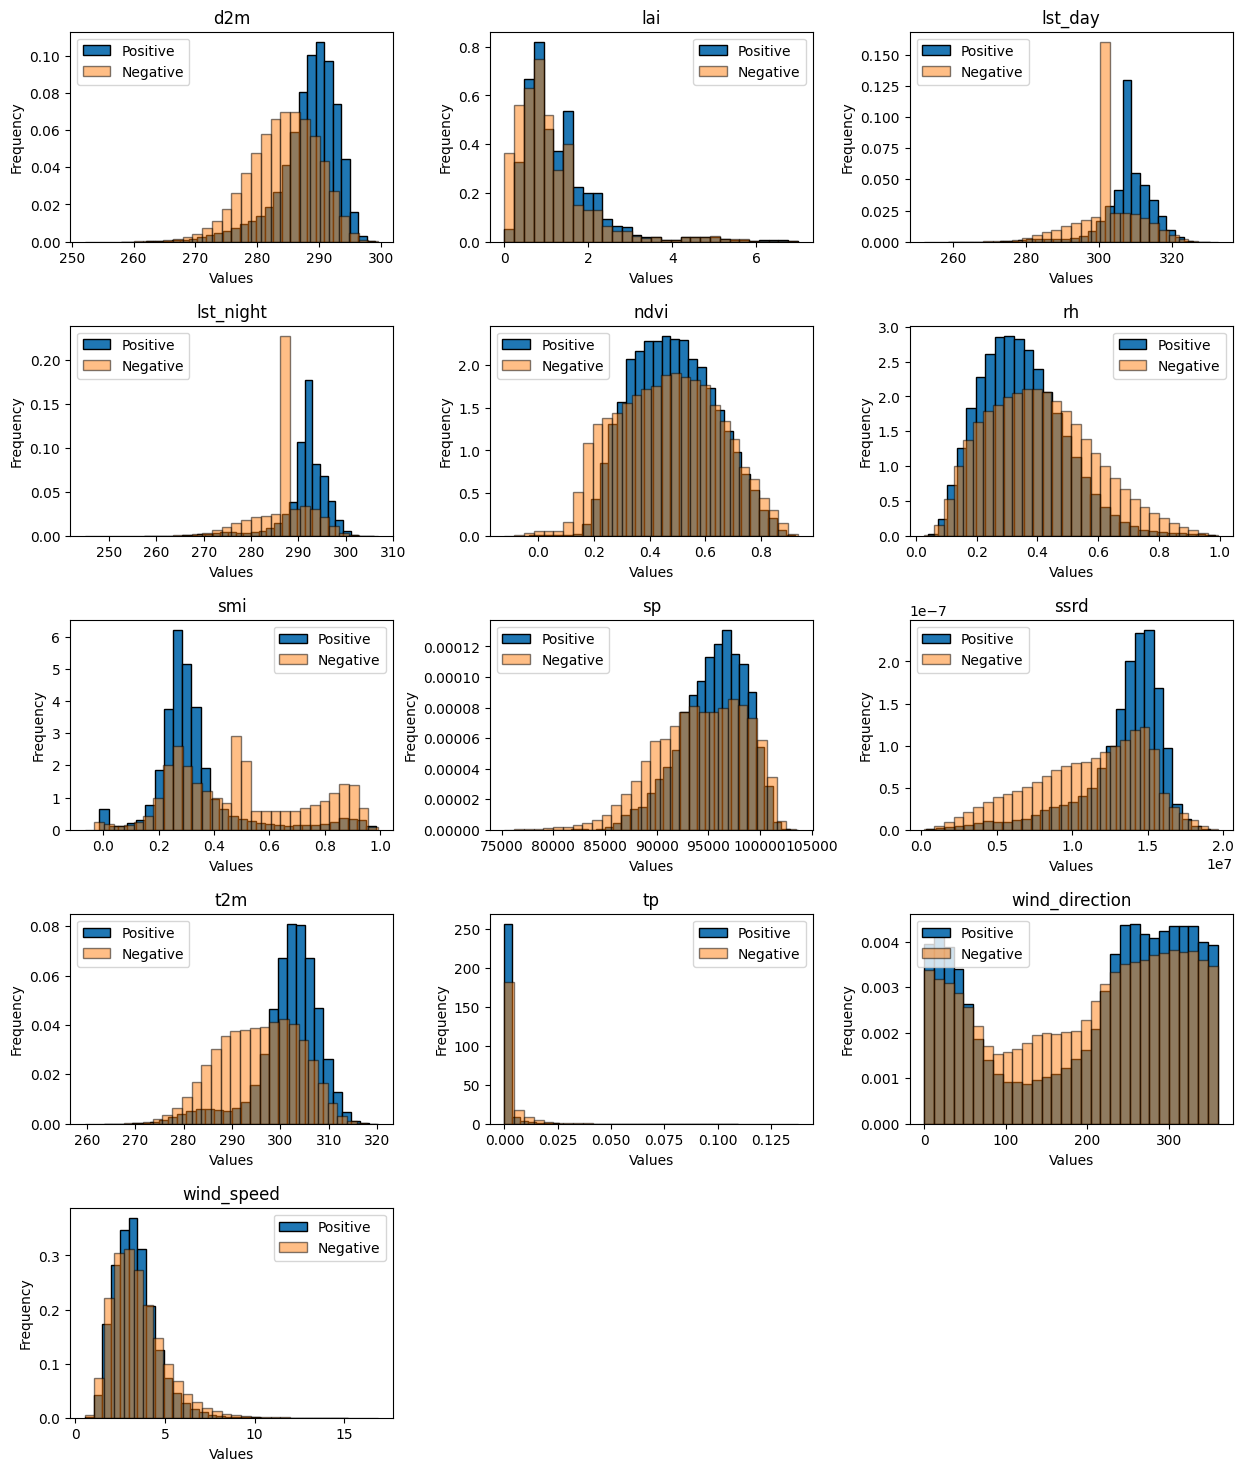

In [38]:
# Array of variables
DynamicVar = ["d2m", "lai", "lst_day", "lst_night", "ndvi", "rh", "smi",
                  "sp", "ssrd", "t2m", "tp", "wind_direction", "wind_speed"]

SemiStaticVar = ['lc_agriculture', 'lc_forest', 'lc_grassland', 'lc_settlement',
            'lc_shrubland', 'lc_sparse_vegetation', 'lc_water_bodies', 'lc_wetland',
            'population']

StaticVar = ["roads_distance", "slope", "aspect", "curvature", "dem"]

fig, ax = plt.subplots(int(np.ceil(len(DynamicVar)/3.)), 3, figsize=(15, 18))

i, j = 0, 0

for var in DynamicVar:
    ax[i//3, j].hist(pos[var], bins=30, edgecolor='black', label="Positive", density = True)
    ax[i//3, j].hist(neg[var], bins=30, edgecolor='black', alpha=0.5, label="Negative", density = True)
    ax[i//3, j].set_title(var)
    ax[i//3, j].set_xlabel('Values')
    ax[i//3, j].set_ylabel('Frequency')
    ax[i//3, j].legend()

    i += 1
    j += 1
    j = j % 3

[fig.delaxes(axes) for axes in ax.flatten() if not axes.has_data()] # from stackoverflow

plt.subplots_adjust(hspace=0.4, wspace = 0.3)
plt.show()

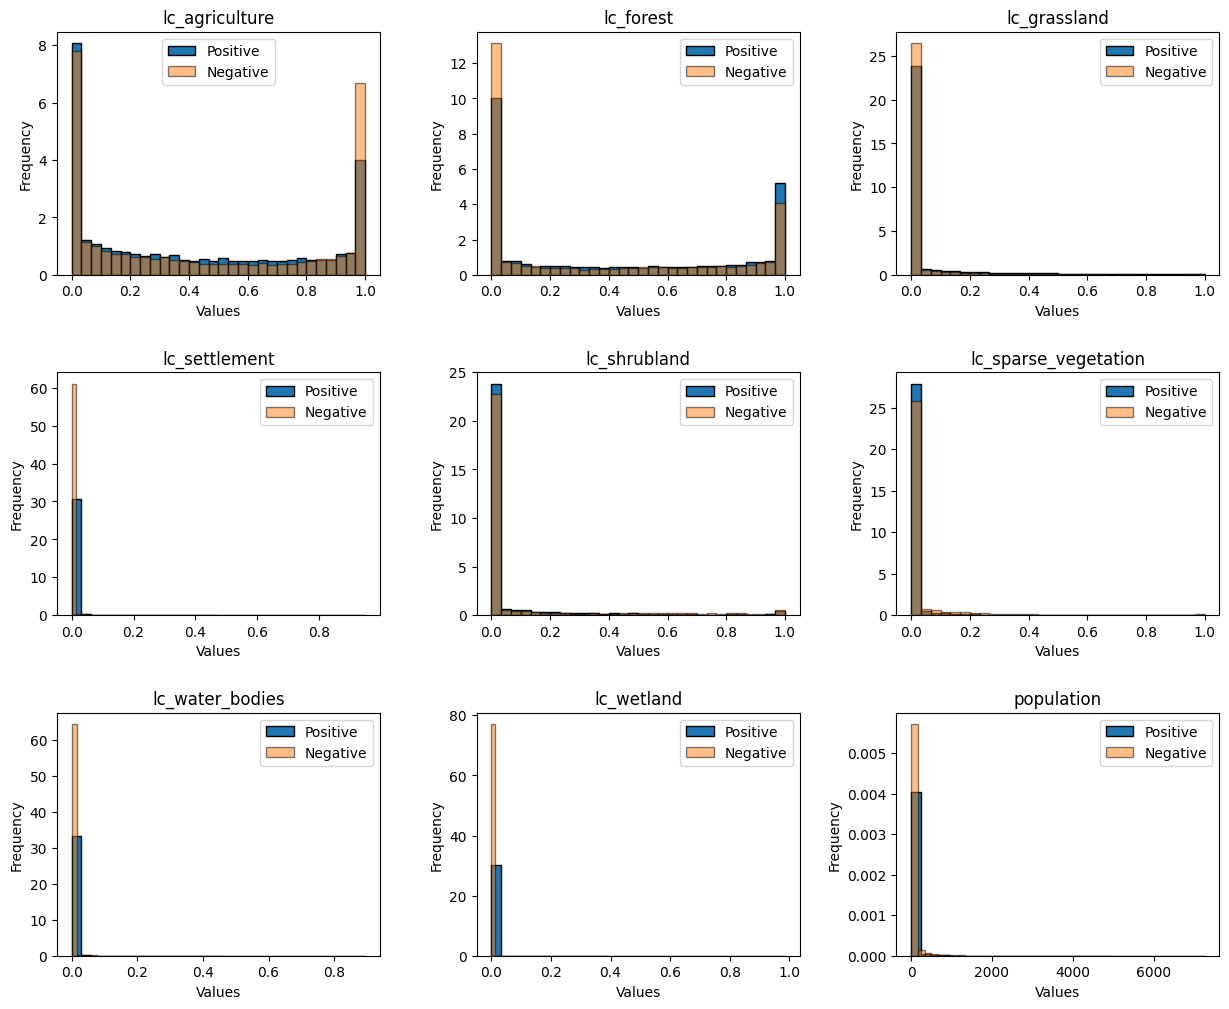

In [39]:
fig, ax = plt.subplots(int(np.ceil(len(SemiStaticVar)/3.)), 3, figsize=(15, 12))

i, j = 0, 0

for var in SemiStaticVar:
    ax[i//3, j].hist(pos[var], bins=30, edgecolor='black', label="Positive", density = True)
    ax[i//3, j].hist(neg[var], bins=30, edgecolor='black', alpha=0.5, label="Negative", density = True)
    ax[i//3, j].set_title(var)
    ax[i//3, j].set_xlabel('Values')
    ax[i//3, j].set_ylabel('Frequency')
    ax[i//3, j].legend()

    i += 1
    j += 1
    j = j % 3

[fig.delaxes(axes) for axes in ax.flatten() if not axes.has_data()] # from stackoverflow

plt.subplots_adjust(hspace=0.4, wspace = 0.3)
plt.show()

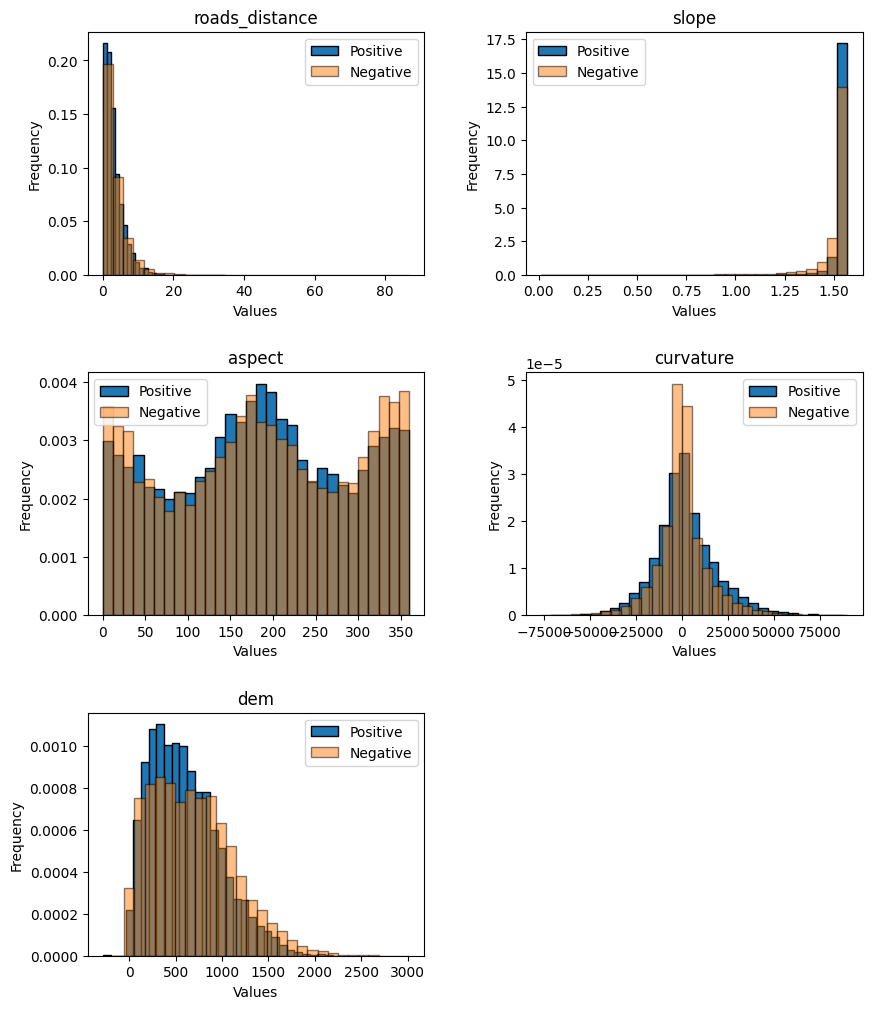

In [37]:
fig, ax = plt.subplots(int(np.ceil(len(StaticVar)/2.)), 2, figsize=(10, 12))

i, j = 0, 0

for var in StaticVar:
    ax[i//2, j].hist(pos[var], bins=30, edgecolor='black', label="Positive", density = True)
    ax[i//2, j].hist(neg[var], bins=30, edgecolor='black', alpha=0.5, label="Negative", density = True)
    ax[i//2, j].set_title(var)
    ax[i//2, j].set_xlabel('Values')
    ax[i//2, j].set_ylabel('Frequency')
    ax[i//2, j].legend()

    i += 1
    j += 1
    j = j % 2

[fig.delaxes(axes) for axes in ax.flatten() if not axes.has_data()] # from stackoverflow

plt.subplots_adjust(hspace=0.4, wspace = 0.3)
plt.show()

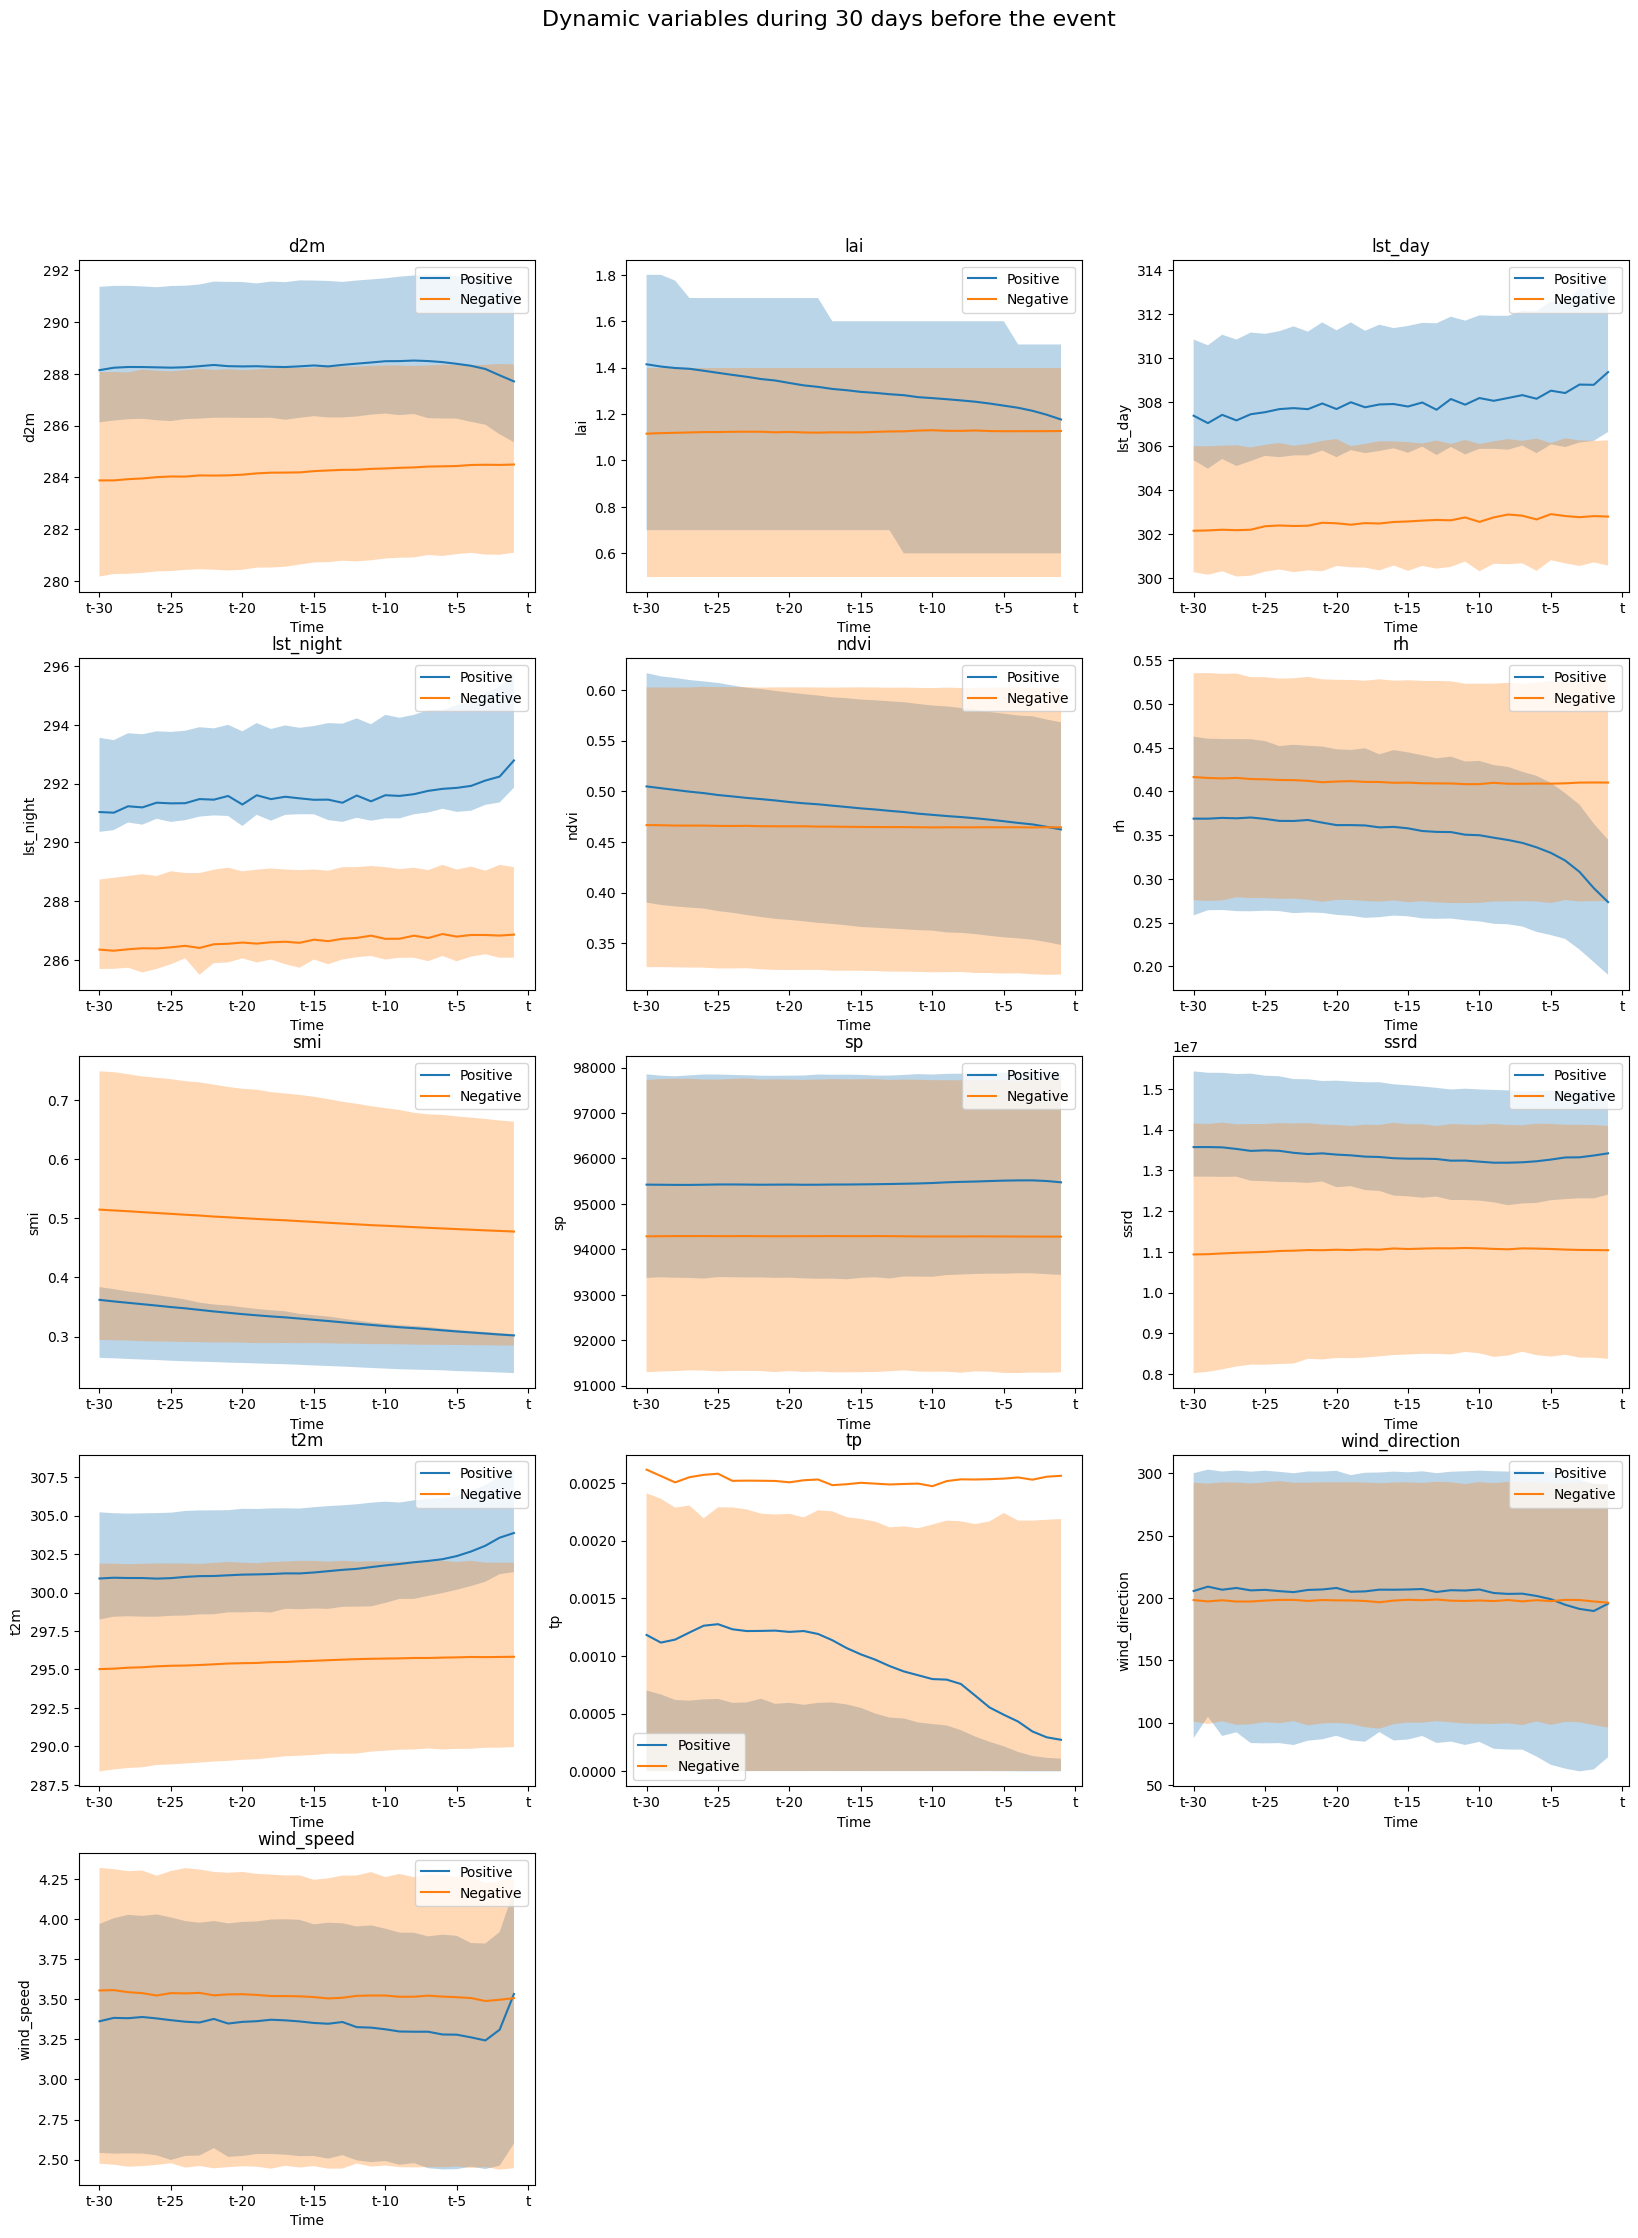

In [36]:
def plotOverTime(dataPos, dataNeg, variable, title, xlabel, ylabel, time):
    posData = dataPos[variable].values
    negData = dataNeg[variable].values

    posData = posData.reshape(posData.size//30, 30)
    negData = negData.reshape(negData.size//30, 30)

    posMean = np.mean(posData, axis=0)
    negMean = np.mean(negData, axis=0)

    posq25 = np.percentile(posData, 25, axis=0)
    posq75 = np.percentile(posData, 75, axis=0)

    negq25 = np.percentile(negData, 25, axis=0)
    negq75 = np.percentile(negData, 75, axis=0)

    plt.figure(figsize=(10, 5))

    plt.plot(posMean, label="Positive")
    plt.plot(negMean, label="Negative")
    plt.fill_between(range(30), posq25, posq75, alpha=0.3)
    plt.fill_between(range(30), negq25, negq75, alpha=0.3)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(range(0, 31, 5), time)
    plt.legend()
    plt.show()

fig, ax = plt.subplots(int(np.ceil(len(DynamicVar)/3.)), 3, figsize=(20, 25))

i, j = 0, 0
time = ["t-30", "t-25", "t-20", "t-15", "t-10", "t-5", "t"]

for var in DynamicVar:
    posData = pos[var].values
    negData = neg[var].values

    posData = posData.reshape(posData.size//30, 30)
    negData = negData.reshape(negData.size//30, 30)

    posMean = np.mean(posData, axis=0)
    negMean = np.mean(negData, axis=0)

    posq25 = np.percentile(posData, 25, axis=0)
    posq75 = np.percentile(posData, 75, axis=0)

    negq25 = np.percentile(negData, 25, axis=0)
    negq75 = np.percentile(negData, 75, axis=0)

    ax[i//3, j].plot(posMean, label="Positive")
    ax[i//3, j].plot(negMean, label="Negative")

    ax[i//3, j].fill_between(range(30), posq25, posq75, alpha=0.3)
    ax[i//3, j].fill_between(range(30), negq25, negq75, alpha=0.3)

    ax[i//3, j].set_title(var)
    ax[i//3, j].set_xlabel('Time')
    ax[i//3, j].set_ylabel(var)
    ax[i//3, j].set_xticks(range(0, 31, 5), time)
    ax[i//3, j].legend()

    i += 1
    j += 1
    j = j % 3

[fig.delaxes(axes) for axes in ax.flatten() if not axes.has_data()] # from stackoverflow


fig.suptitle('Dynamic variables during 30 days before the event', fontsize=16)
plt.show()